<a href="https://colab.research.google.com/github/nattapon44/66666/blob/main/project_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Video game Sales**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
game_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
game_sales.shape

(16598, 11)

In [ ]:
game_sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [ ]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
game_sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
game_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
game_sales.mode()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Need for Speed: Most Wanted,DS,2009.0,Action,Electronic Arts,0.0,0.0,0.0,0.0,0.02
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16594,16597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16595,16598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16596,16599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Fill NA with mode
game_sales[['Year']] = game_sales[['Year']].fillna(game_sales[['Year']].mode().iloc[0,0])
game_sales[['Publisher']] = game_sales[['Publisher']].fillna(game_sales[['Publisher']].mode().iloc[0,0])

In [ ]:
game_sales.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [ ]:
list(set(game_sales['Genre']))

['Role-Playing',
 'Puzzle',
 'Misc',
 'Simulation',
 'Sports',
 'Shooter',
 'Action',
 'Adventure',
 'Fighting',
 'Racing',
 'Platform',
 'Strategy']

<ipython-input-43-d935b3802e92>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  G=game_sales.groupby(["Genre"]).sum()


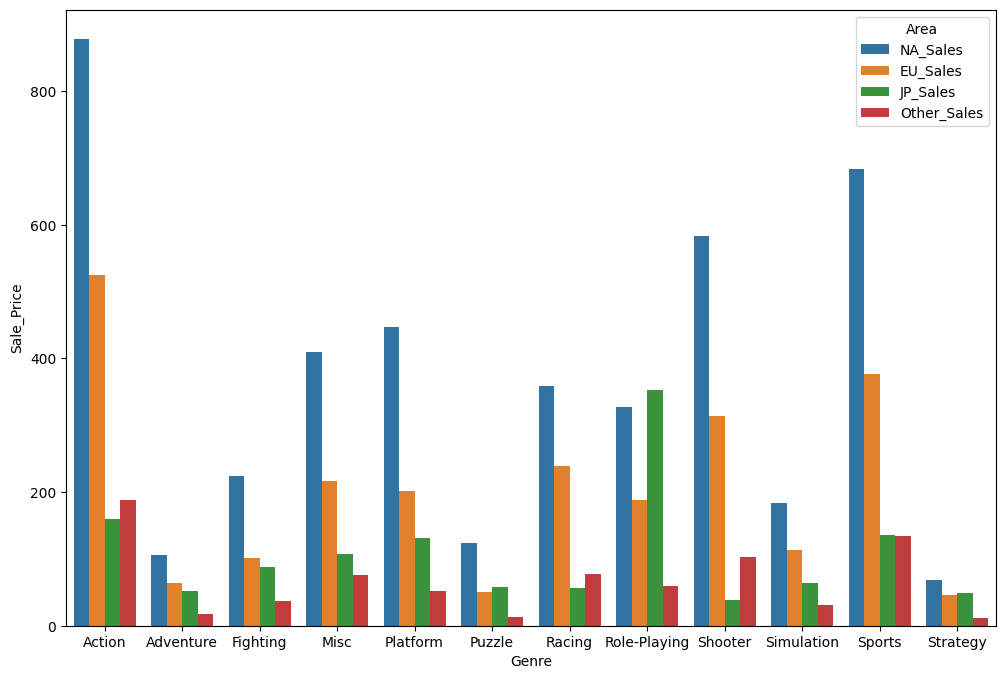

In [ ]:
plt.figure(figsize=(12, 8))
G=game_sales.groupby(["Genre"]).sum()
Genres=G.reset_index()
Genres=pd.melt(Genres, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Area', value_name='Sale_Price')
sns.barplot(x="Genre",y="Sale_Price",data=Genres,hue="Area")
plt.show()

<Axes: xlabel='Genre'>

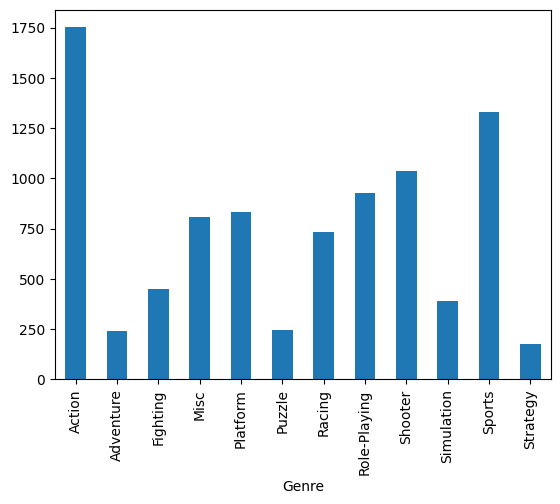

In [ ]:
game_sales.groupby('Genre')['Global_Sales'].sum().plot.bar()

Text(0.5, 1.0, 'Game Published by Year')

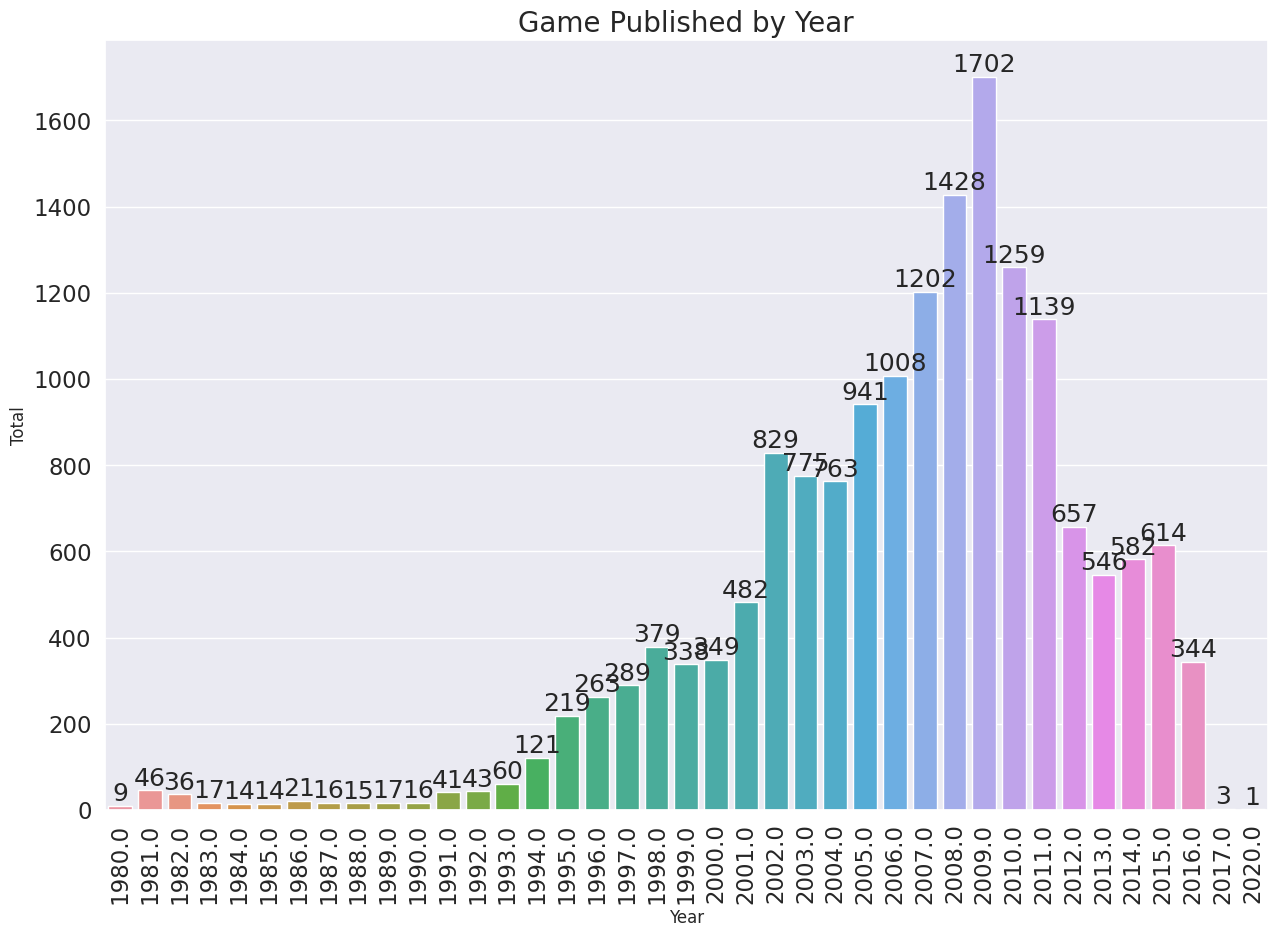

In [ ]:
plt.figure(figsize=(15,10))
chart1=sns.countplot(x='Year',data=game_sales, order=game_sales['Year'].value_counts().sort_index(ascending=True).index)
chart1.bar_label(chart1.containers[0], label_type='edge')
plt.xticks(rotation=90)
plt.xlabel('Year', size = 12)
plt.ylabel('Total', size = 12)
plt.title ('Game Published by Year', size = 20)

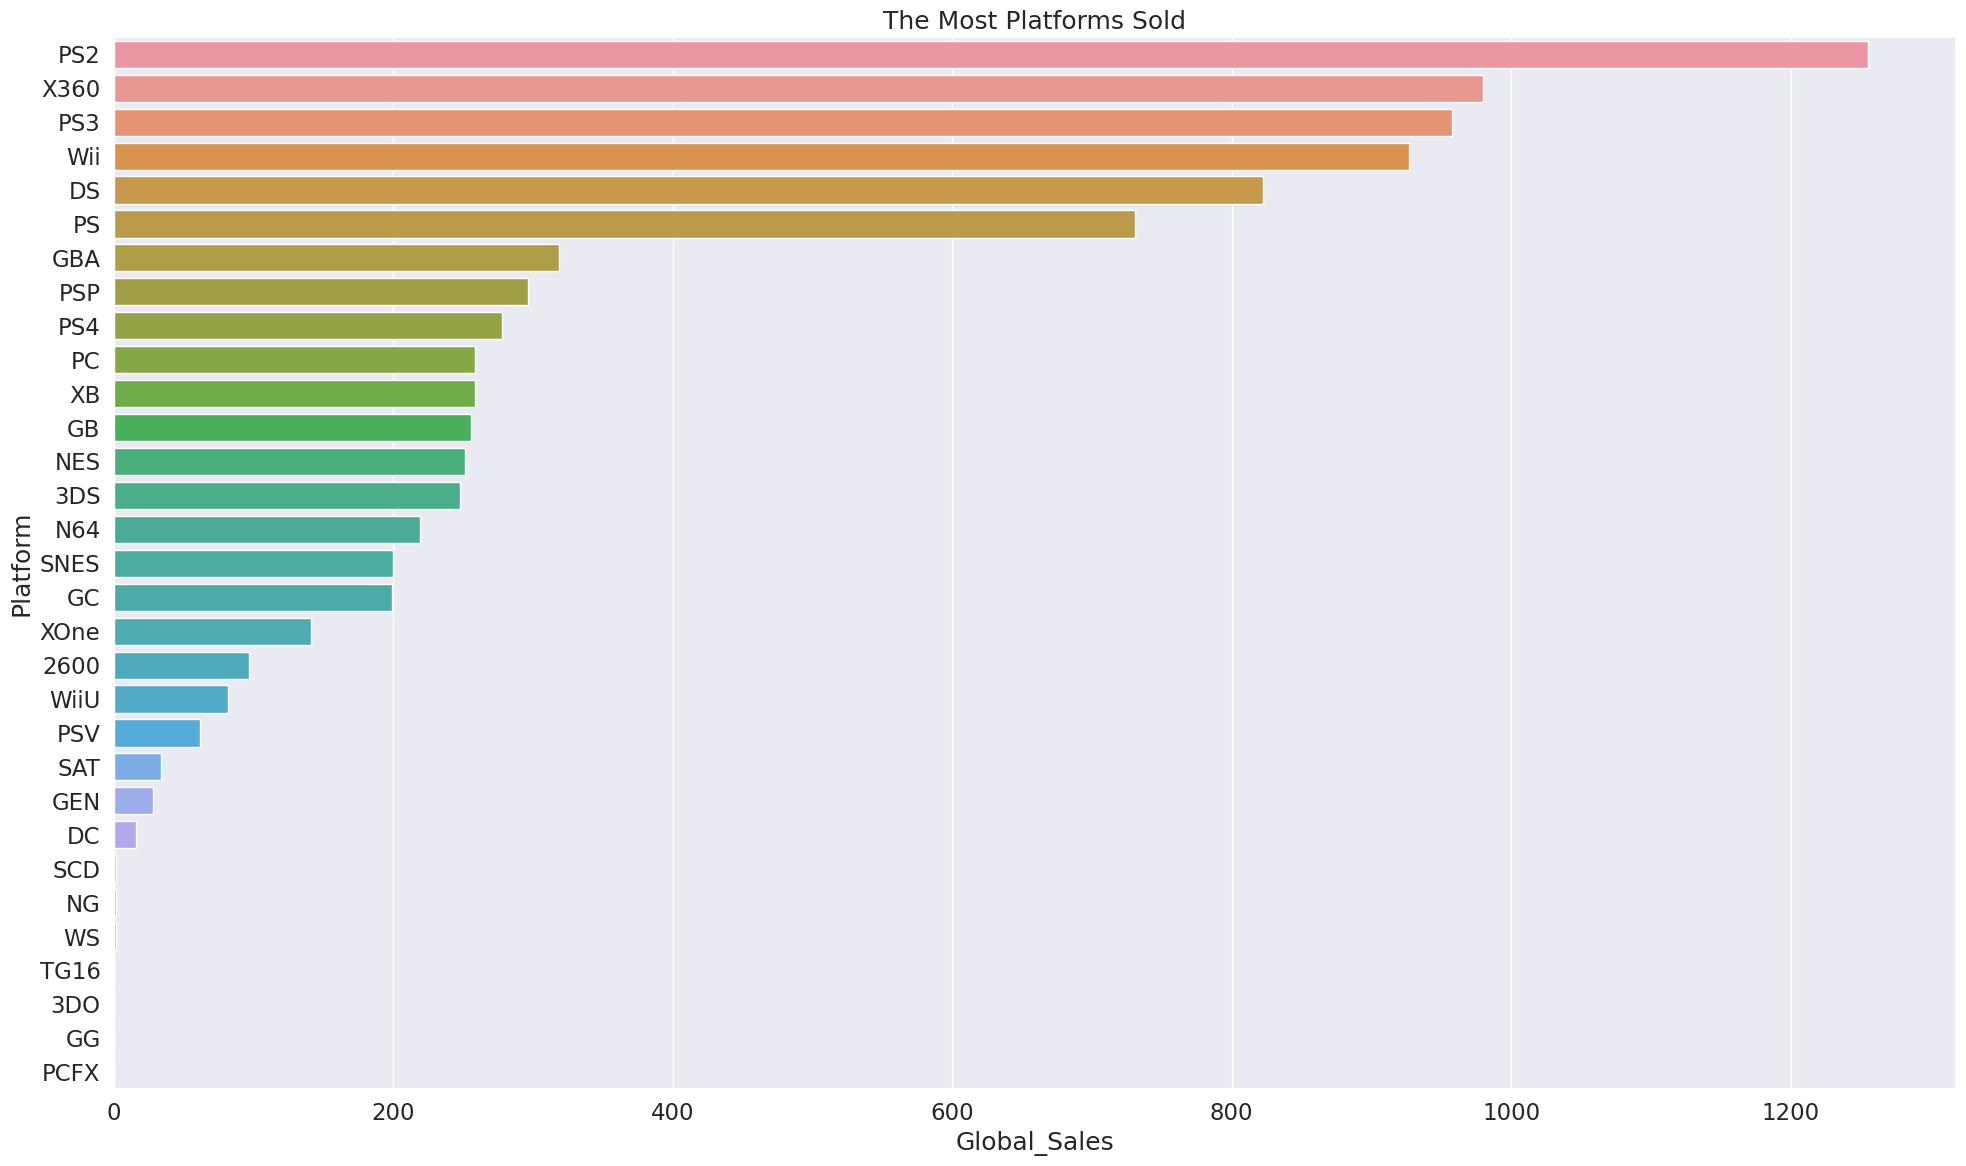

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale = 1.5)
genre=game_sales.groupby(["Platform"])["Global_Sales"].sum().reset_index()
genre=genre.sort_values(by="Global_Sales",ascending=False)
sns.barplot(y="Platform",x="Global_Sales",data=genre)
plt.title("The Most Platforms Sold")
plt.tight_layout()

In [ ]:
game_sales['Publisher'].value_counts().head(20)

Electronic Arts                           1409
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Unknown                                    203
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Name: Publisher, dtype: int64